In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style("ticks")

In [2]:
##Her değeri check etmek için bir fonksiyon oluşturduk
def check_df(dataframe, shape=False, dtypes=False, head=False, tail=False, nullinfo=False):
    if shape:
        print("-----SHAPE-----")
        print(dataframe.shape)
    if dtypes:
        print("-----DTYPES-----")
        print(dataframe.dtypes)
    if head:
        print("-----HEAD-----")
        print(dataframe.head(head))
    if tail:
        print("-----TAIL-----")
        print(dataframe.tail(tail))
    if nullinfo:
        print("-----NULLINFO----")
        print(dataframe.isnull().sum())

In [3]:
"""def get_data(url):
    file_id = url.split('/')[-2]
    dwn_url = 'https://drive.google.com/uc?id=' + file_id
    return dwn_url


movie = pd.read_csv(get_data("https://drive.google.com/file/d/1I_mSFV3uGxhAjy0LYkSBvaw7ZVjR_90N/view?usp=drive_link")"""


'def get_data(url):\n    file_id = url.split(\'/\')[-2]\n    dwn_url = \'https://drive.google.com/uc?id=\' + file_id\n    return dwn_url\n\n\nmovie = pd.read_csv(get_data("https://drive.google.com/file/d/1I_mSFV3uGxhAjy0LYkSBvaw7ZVjR_90N/view?usp=drive_link")'

In [4]:
movie = pd.read_csv("movie.csv", delimiter=",")

In [5]:
movie.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
check_df(movie, shape=True, dtypes=True, head=10, tail=10, nullinfo=True)

-----SHAPE-----
(27278, 3)
-----DTYPES-----
movieId     int64
title      object
genres     object
dtype: object
-----HEAD-----
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        Act

In [7]:
movie["genres"].value_counts()

genres
Drama                                                  4520
Comedy                                                 2294
Documentary                                            1942
Comedy|Drama                                           1264
Drama|Romance                                          1075
                                                       ... 
Action|Comedy|Crime|Western                               1
Action|Fantasy|Sci-Fi|Thriller                            1
Action|Drama|Fantasy|Horror|Mystery|Sci-Fi|Thriller       1
Action|Drama|Fantasy|Romance                              1
Animation|Children|Comedy|Western                         1
Name: count, Length: 1342, dtype: int64

In [8]:
## genres sütunundaki boşluklarımızı standart bir değer olan "NaN" ile değiştiriyoruz.
movie.loc[movie["genres"] == "(no genres listed)", "genres"] = np.nan

In [9]:
movie.isnull().sum()

movieId      0
title        0
genres     246
dtype: int64

In [10]:
movie.nunique()

movieId    27278
title      27262
genres      1341
dtype: int64

In [11]:
movie["title"].value_counts()

title
Aladdin (1992)                                                    2
Johnny Express (2014)                                             2
Chaos (2005)                                                      2
Hamlet (2000)                                                     2
20,000 Leagues Under the Sea (1997)                               2
                                                                 ..
Tai Chi Master (Twin Warriors) (Tai ji: Zhang San Feng) (1993)    1
Splitting Heirs (1993)                                            1
Sonatine (Sonachine) (1993)                                       1
Snapper, The (1993)                                               1
Innocence (2014)                                                  1
Name: count, Length: 27262, dtype: int64

In [12]:
dup_movie = movie.groupby('title').size() > 1
dup_title = dup_movie[dup_movie].index.tolist()
print(dup_movie)
print(dup_title)

title
#chicagoGirl: The Social Network Takes on a Dictator (2013)    False
$ (Dollars) (1971)                                             False
$5 a Day (2008)                                                False
$9.99 (2008)                                                   False
$ellebrity (Sellebrity) (2012)                                 False
                                                               ...  
À propos de Nice (1930)                                        False
Árido Movie (2005)                                             False
Åsa-Nisse - Wälkom to Knohult (2011)                           False
Üvegtigris (2001)                                              False
貞子3D (2012)                                                    False
Length: 27262, dtype: bool
['20,000 Leagues Under the Sea (1997)', 'Aladdin (1992)', 'Beneath (2013)', 'Blackout (2007)', 'Casanova (2005)', 'Chaos (2005)', 'Clear History (2013)', 'Darling (2007)', 'Emma (1996)', 'Girl, The (2012)', '

In [13]:
dup_rows = movie[movie["title"].isin(dup_title)].sort_values("title")
print(dup_rows.to_string(index=False))

 movieId                               title                                      genres
  114130 20,000 Leagues Under the Sea (1997)                              Romance|Sci-Fi
  102190 20,000 Leagues Under the Sea (1997)                    Adventure|Romance|Sci-Fi
     588                      Aladdin (1992) Adventure|Animation|Children|Comedy|Musical
  114240                      Aladdin (1992) Adventure|Animation|Children|Comedy|Fantasy
  115777                      Beneath (2013)                                      Horror
  104035                      Beneath (2013)                                      Horror
   66140                     Blackout (2007)                             Horror|Thriller
   85070                     Blackout (2007)                                       Drama
  128862                     Casanova (2005)                        Comedy|Drama|Romance
   42015                     Casanova (2005)       Action|Adventure|Comedy|Drama|Romance
   47254             

In [14]:
dup_rows

,movieId,title,genres
24064,114130,"20,000 Leagues Under the Sea (1997)",Romance|Sci-Fi
20923,102190,"20,000 Leagues Under the Sea (1997)",Adventure|Romance|Sci-Fi
582,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
24092,114240,Aladdin (1992),Adventure|Animation|Children|Comedy|Fantasy
24437,115777,Beneath (2013),Horror
21429,104035,Beneath (2013),Horror
13417,66140,Blackout (2007),Horror|Thriller
16827,85070,Blackout (2007),Drama
26808,128862,Casanova (2005),Comedy|Drama|Romance
10694,42015,Casanova (2005),Action|Adventure|Comedy|Drama|Romance


In [15]:
## film türlerini ayırdık
genres = []

def film_turleri(x):
    global genres
    new_genres = x.split("|")
    for genre in new_genres:
        if genre not in genres:
            genres.append(genre)


In [16]:
movie[~movie["genres"].isnull()]["genres"].apply(lambda x : film_turleri(x));genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'IMAX',
 'Documentary',
 'War',
 'Musical',
 'Western',
 'Film-Noir']

In [17]:
#19 farklı türde filmimiz bulunuyor 
len(genres)

19

In [18]:
#Her bir film türünü bir kolona atayarak film o türü içeriyorsa 1 içermiyorsa 0 yazdık, boş olmayan değerleri seçtik
for pm in genres:
    movie[pm] = movie[~movie["genres"].isnull()]["genres"].apply(lambda x : 1 if pm in x else 0)

In [19]:
movie

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27275,131258,The Pirates (2014),Adventure,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27276,131260,Rentun Ruusu (2001),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
## Her türdeki film sayısını hesapladık 
movie_genres_count = movie[genres].sum().sort_values(ascending=False);movie_genres_count

Drama          13344.0
Comedy          8374.0
Thriller        4178.0
Romance         4127.0
Action          3520.0
Crime           2939.0
Horror          2611.0
Documentary     2471.0
Adventure       2329.0
Sci-Fi          1743.0
Mystery         1514.0
Fantasy         1412.0
War             1194.0
Children        1139.0
Musical         1036.0
Animation       1027.0
Western          676.0
Film-Noir        330.0
IMAX             196.0
dtype: float64

In [21]:
#Film türlerini df'e çevirdik
movie_genres_count_df = movie_genres_count.to_frame().reset_index()
movie_genres_count_df.columns = ['Genre', 'Total Movies']
print(movie_genres_count_df)

          Genre  Total Movies
0         Drama       13344.0
1        Comedy        8374.0
2      Thriller        4178.0
3       Romance        4127.0
4        Action        3520.0
5         Crime        2939.0
6        Horror        2611.0
7   Documentary        2471.0
8     Adventure        2329.0
9        Sci-Fi        1743.0
10      Mystery        1514.0
11      Fantasy        1412.0
12          War        1194.0
13     Children        1139.0
14      Musical        1036.0
15    Animation        1027.0
16      Western         676.0
17    Film-Noir         330.0
18         IMAX         196.0


In [22]:
movie_genres_count_df

,Genre,Total Movies
0,Drama,13344.0
1,Comedy,8374.0
2,Thriller,4178.0
3,Romance,4127.0
4,Action,3520.0
5,Crime,2939.0
6,Horror,2611.0
7,Documentary,2471.0
8,Adventure,2329.0
9,Sci-Fi,1743.0


In [23]:
movie

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27275,131258,The Pirates (2014),Adventure,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27276,131260,Rentun Ruusu (2001),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
## grafik çizeceğiz

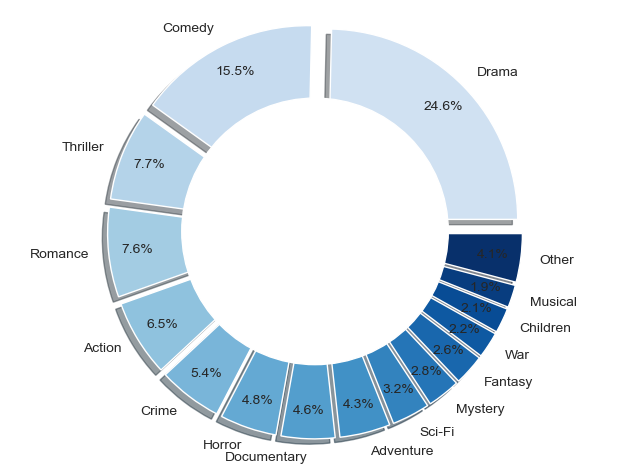

In [25]:

import matplotlib.pyplot as plt
import numpy as np

# Veri
labels = movie_genres_count_df['Genre'][:15].tolist() + ['Other']
sizes = movie_genres_count_df["Total Movies"][:15].tolist() + [movie_genres_count_df["Total Movies"][15:].sum()]
explode = [0.09] * len(labels)  # Her dilim için aynı patlama,sayıyı büyüttükçe aralarındaki boşluk artıyor.

# Renkler
colors = plt.cm.Blues(np.linspace(0.2, 1, len(labels)))  # Mavi tonlarına göre renkler

# Daire grafiği oluşturma
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', pctdistance=0.85, shadow=True, colors=colors)

# Merkezinde delik oluşturma
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Eksenleri eşit şekilde ayarlama
ax.axis('equal')

# Grafiği göster
plt.tight_layout()
plt.show()


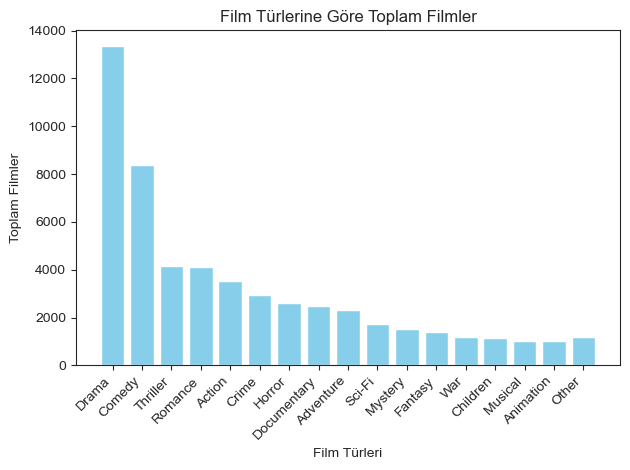

In [26]:
#Çubuk grafiğinde sayılara göre türleri çıkardık-oranlara göre değil:
import matplotlib.pyplot as plt

# Veri
labels = movie_genres_count_df['Genre'][:16].tolist() + ['Other']
sizes = movie_genres_count_df["Total Movies"][:16].tolist() + [movie_genres_count_df["Total Movies"][16:].sum()]

# Çubuk grafiği oluşturma
fig, ax = plt.subplots()
ax.bar(labels, sizes, color='skyblue')

# Eksen etiketlerini ve başlığı ayarlama
ax.set_xlabel('Film Türleri')
ax.set_ylabel('Toplam Filmler')
ax.set_title('Film Türlerine Göre Toplam Filmler')

# X ekseni etiketlerini döndürme
plt.xticks(rotation=45, ha='right')

# Grafiği göster
plt.tight_layout()
plt.show()


In [27]:
def Film_year(x):
    # Parantez içindeki değeri al
    year = x.strip()[-5:-1]
    # Eğer bu değer sayısal bir değer ise, yılı döndür
    if year.isdigit():
        return year
    else:
        # Eğer değer sayısal değilse veya yoksa, NaN (Not a Number) döndür
        return np.nan

In [28]:
# Yeni "Film Year" sütunu oluştur
movie["Film Year"] = movie["title"].apply(Film_year)

In [29]:
movie["Film Year"] = pd.to_numeric(movie["Film Year"],errors = "ignore" )

In [30]:
movie

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,Film Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007.0
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002.0
27275,131258,The Pirates (2014),Adventure,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0
27276,131260,Rentun Ruusu (2001),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.0


In [31]:
movie["Film Year"].head(20)

0     1995.0
1     1995.0
2     1995.0
3     1995.0
4     1995.0
5     1995.0
6     1995.0
7     1995.0
8     1995.0
9     1995.0
10    1995.0
11    1995.0
12    1995.0
13    1995.0
14    1995.0
15    1995.0
16    1995.0
17    1995.0
18    1995.0
19    1995.0
Name: Film Year, dtype: float64

In [32]:
movie[["Film Year"]].value_counts().head(20)

Film Year
2009.0       1113
2012.0       1022
2011.0       1016
2013.0       1011
2008.0        979
2010.0        962
2007.0        902
2006.0        855
2005.0        741
2014.0        740
2004.0        705
2002.0        677
2003.0        655
2001.0        633
2000.0        613
1998.0        554
1999.0        542
1997.0        528
1996.0        509
1995.0        474
Name: count, dtype: int64

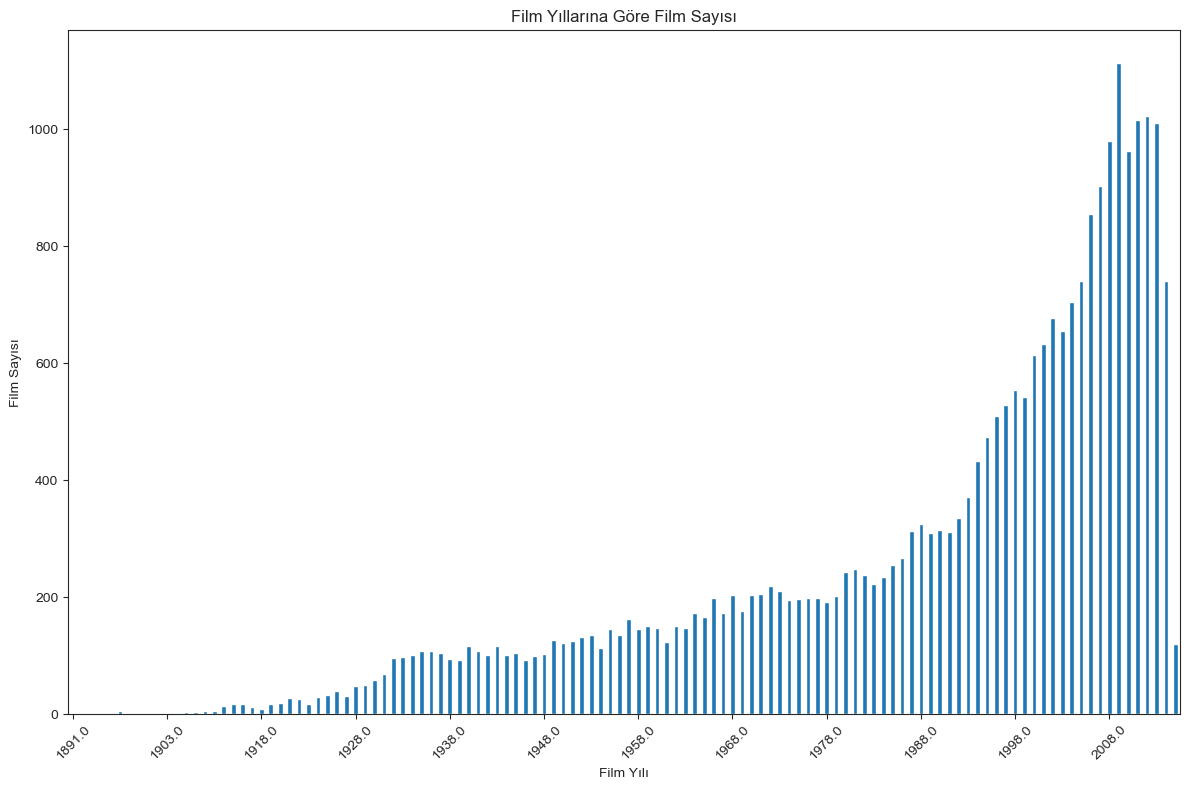

In [33]:
import matplotlib.pyplot as plt

# Film yıllarına göre film sayılarını hesaplayın
film_counts = movie['Film Year'].value_counts().sort_index()

# Çubuk grafiği oluştur
plt.figure(figsize=(12, 8))
film_counts.plot(kind='bar')

# Eksen etiketlerini ve başlığı ayarlayın
plt.xlabel('Film Yılı')
plt.ylabel('Film Sayısı')
plt.title('Film Yıllarına Göre Film Sayısı')

# Yılları daha okunabilir hale getirme
plt.xticks(range(0, len(film_counts.index), 10), rotation=45)

# Grafiği göster
plt.tight_layout()
plt.show()


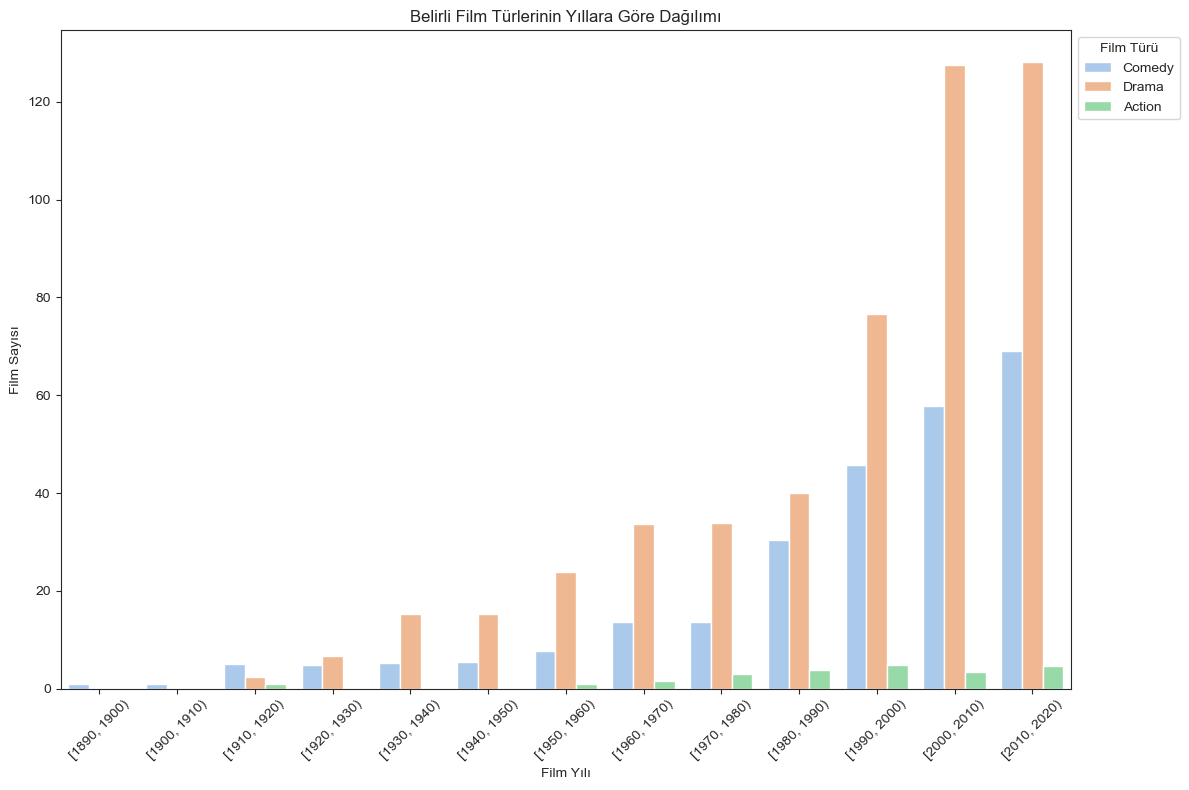

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pastel renk paletini tanımla
pastel_palette = sns.color_palette("pastel")

# Göstermek istediğiniz film türlerini belirleyin
selected_genres = ['Action', 'Comedy','Drama']

# Belirli türlerin bulunduğu verileri filtreleyin
filtered_data = movie[movie['genres'].isin(selected_genres)]

# Filtrelenmiş verilere göre film yıllarına ve türlere göre gruplanmış film sayılarını hesaplayın
grouped_data = filtered_data.groupby(['Film Year', 'genres']).size().reset_index(name='Count')

# Yılları 10'ar 10'ar ayırmak için kategori oluşturun
grouped_data['Film Year'] = pd.cut(grouped_data['Film Year'], bins=range(1890, 2021, 10), right=False)

# Çubuk grafiği oluştur
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='Film Year', y='Count', hue='genres', palette=pastel_palette, errorbar=None)

# Eksen etiketlerini ve başlığı ayarlayın
plt.xlabel('Film Yılı')
plt.ylabel('Film Sayısı')
plt.title('Belirli Film Türlerinin Yıllara Göre Dağılımı')

# Grafiği göster
plt.legend(title='Film Türü', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


RATİNG

In [35]:
rating = pd.read_csv(r'C:\Users\HP\Desktop\PythonLab\rating.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [36]:
check_df(rating, shape=True, dtypes=True, head=5, tail=5, nullinfo=True)

-----SHAPE-----
(20000263, 4)
-----DTYPES-----
userId         int64
movieId        int64
rating       float64
timestamp     object
dtype: object
-----HEAD-----
   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40
-----TAIL-----
          userId  movieId  rating            timestamp
20000258  138493    68954     4.5  2009-11-13 15:42:00
20000259  138493    69526     4.5  2009-12-03 18:31:48
20000260  138493    69644     3.0  2009-12-07 18:10:57
20000261  138493    70286     5.0  2009-11-13 15:42:24
20000262  138493    71619     2.5  2009-10-17 20:25:36
-----NULLINFO----
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [37]:
rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [38]:
#movie dosyasındaki movie ıd sayısı ile aynı değil 534 movie fazla buna bak!!!!!!!!!!!!!!!11
rating.nunique()

userId         138493
movieId         26744
rating             10
timestamp    15351121
dtype: int64

In [39]:
rating["rating"].value_counts()

rating
4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: count, dtype: int64

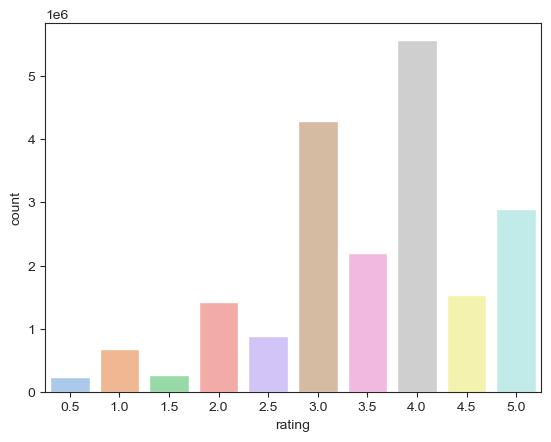

In [40]:

import seaborn as sns
import matplotlib.pyplot as plt
# Pastel renk paletini tanımla
pastel_palette = sns.color_palette("pastel")
# countplot'u oluştur ve pastel renk paletini kullan
sns.countplot(x=rating["rating"], data=movie, palette=pastel_palette)
plt.show()


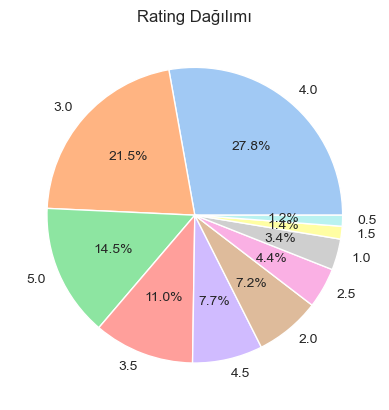

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastel renk paletini tanımla
pastel_palette = sns.color_palette("pastel")

# Her bir derecelendirme puanının sayısını hesaplayın
rating_counts = rating["rating"].value_counts()

# Pie chart çizin ve pastel renk paletini kullanın
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=pastel_palette)
plt.title("Rating Dağılımı")
plt.show()


In [42]:
# En çok oy kullanan kullanıcılar
rating.groupby("userId").agg({"rating":["count","mean"]}).sort_values(("rating","count"), ascending=False).head(10)

rating          
        count      mean
userId                 
118205   9254  3.279069
8405     7515  3.208317
82418    5646  3.516915
121535   5520  2.793116
125794   5491  3.762976
74142    5447  1.577474
34576    5356  3.011669
131904   5330  3.248874
83090    5169  2.404914
59477    4988  2.455092

In [43]:
# En az oy kullanan kullanıcılar
rating.groupby("userId").agg({"rating":["count","mean"]}).sort_values(("rating","count")).head(10)

rating       
        count   mean
userId              
39574      20  2.800
61692      20  3.525
20578      20  3.200
68139      20  3.425
21882      20  3.850
41288      20  2.200
120164     20  3.750
68123      20  3.750
50578      20  3.850
108565     20  4.400

In [44]:
# Ortalama en çok puan veren kullanıcılar 
rating.groupby("userId").agg({"rating":["count","mean"]}).sort_values([("rating","mean"),("rating","count")], ascending=False).head(15)

rating     
        count mean
userId            
113703    219  5.0
42101     100  5.0
119345     97  5.0
51651      65  5.0
119100     57  5.0
125802     53  5.0
93230      52  5.0
72369      51  5.0
54126      49  5.0
39839      45  5.0
51442      42  5.0
4404       35  5.0
52236      35  5.0
102396     35  5.0
135200     35  5.0

In [45]:
# Ortalama en az puan veren kullanıcılar
rating.groupby("userId").agg({"rating":["count","mean"]}).sort_values([("rating","mean"),("rating","count")]).head(15)

rating          
        count      mean
userId                 
20501      20  0.500000
20511      20  0.500000
44174      20  0.500000
65365      20  0.500000
67322      20  0.500000
72823      20  0.500000
74084      20  0.500000
74276      20  0.500000
103630     20  0.500000
106618     20  0.500000
117730     20  0.500000
24530      21  0.500000
16983      29  0.500000
85669      22  0.522727
90247      20  0.525000

In [46]:
IMDB = rating.merge(movie[["movieId","title","genres","Film Year"]])
IMDB.head()

,userId,movieId,rating,timestamp,title,genres,Film Year
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy,1995.0
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy,1995.0
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy,1995.0


In [47]:
IMDB.shape

(20000263, 7)

In [48]:
# En az oy verilen filmler
IMDB.groupby(["title"]).agg({"rating":["count","mean"]}).sort_values([("rating","count")]).head(10)

rating     
                                                    count mean
title                                                         
貞子3D (2012)                                             1  1.5
Lucky Jordan (1942)                                     1  3.0
Born to Defense (Zhong hua ying xiong) (1986)           1  3.5
Luck, Trust & Ketchup: Robert Altman in Carver ...      1  4.0
Lowlands (Tiefland) (1954)                              1  3.5
Loving (1970)                                           1  3.0
Lovesick (1983)                                         1  4.0
Lovers and Lollipops (1956)                             1  2.5
Borrowed Time (2012)                                    1  2.0
Lovely to Look At (1952)                                1  3.0

In [49]:
##her film için toplam derecelendirme sayısı ve ortalama derecelendirme değerlerini içeren bir gruplama yaptık. 
##Böylece, en çok derecelendirilen filmlerden en az derecelendirilenlere kadar bir sıralama elde edilmiştir.

SıralıIMDB = IMDB.groupby(["title"]).agg({"rating":["count","mean"]}).sort_values([("rating","count")], ascending=False).reset_index()
SıralıIMDB

title rating          
                                         count      mean
0                   Pulp Fiction (1994)  67310  4.174231
1                   Forrest Gump (1994)  66172  4.029000
2      Shawshank Redemption, The (1994)  63366  4.446990
3      Silence of the Lambs, The (1991)  63299  4.177057
4                  Jurassic Park (1993)  59715  3.664741
...                                 ...    ...       ...
26724            The Hatchet Man (1932)      1  3.500000
26725       The Harry Hill Movie (2013)      1  2.500000
26726           The Harmony Game (2011)      1  4.000000
26727           The Hanoi Hilton (1987)      1  2.500000
26728                       貞子3D (2012)      1  1.500000

[26729 rows x 3 columns]

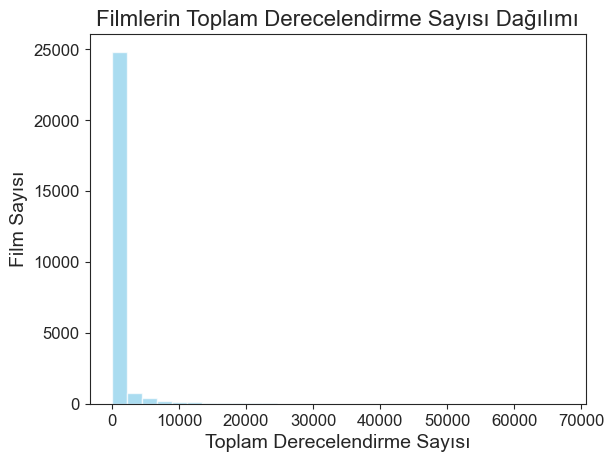

In [50]:
# Histogram grafiğini oluşturun
ratings_count = SıralıIMDB["rating", "count"]
ratings_count
plt.hist(ratings_count, bins=30, color='skyblue', edgecolor='white', alpha=0.7)

# Grafiği süsleyin
plt.xlabel('Toplam Derecelendirme Sayısı', fontsize=14)
plt.ylabel('Film Sayısı', fontsize=14)
plt.title('Filmlerin Toplam Derecelendirme Sayısı Dağılımı', fontsize=16)

# Eksen etiketlerini büyütün
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Kutu kenarlarını kaldırın
plt.box(True)

# Grafiği gösterin
plt.show()


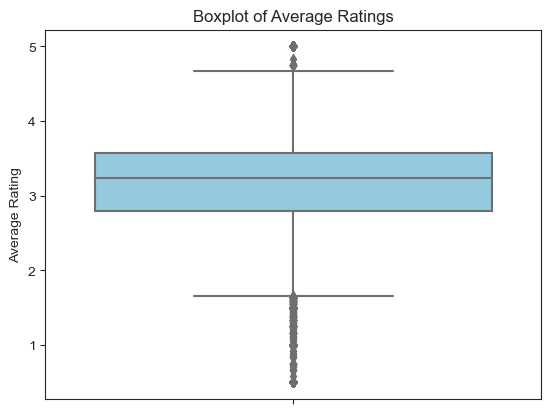

In [51]:
#Değerleri dikey olarak değiştirdim.
# Kutu grafiğini oluşturun ve x ile y eksenlerini yer değiştirin
sns.boxplot(y=SıralıIMDB["rating", "mean"], color='skyblue')

# Grafiği süsleyin
plt.ylabel('Average Rating')  # x ekseninin etiketini değiştiriyoruz
plt.title('Boxplot of Average Ratings')

# Grafiği gösterin
plt.show()


In [52]:
rating.groupby("movieId").agg({"rating":["count"]}).describe([0.25,0.5,0.75,0.85,0.9,0.99])

,rating
,count
count,26744.000000
mean,747.841123
std,3085.818268
min,1.000000
25%,3.000000
50%,18.000000
75%,205.000000
85%,632.550000
90%,1305.700000


In [53]:
#Burada artık 1000'e göre sıralama yapıyoruz,filtreli olarak alıyoruz.
SıralıIMDB = (rating.groupby("movieId").agg({"rating":"count"}) > 1000).reset_index()
SıralıIMDB[SıralıIMDB["rating"] == True]["movieId"]

0             1
1             2
2             3
3             4
4             5
          ...  
22964    110102
23240    111362
23332    111759
23506    112556
23574    112852
Name: movieId, Length: 3159, dtype: int64

In [54]:
son=rating[rating["movieId"].isin(SıralıIMDB[SıralıIMDB["rating"] == True]["movieId"])]
son

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000252,138493,60069,4.0,2009-11-13 17:51:27
20000257,138493,68319,4.5,2009-12-07 18:15:20
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48


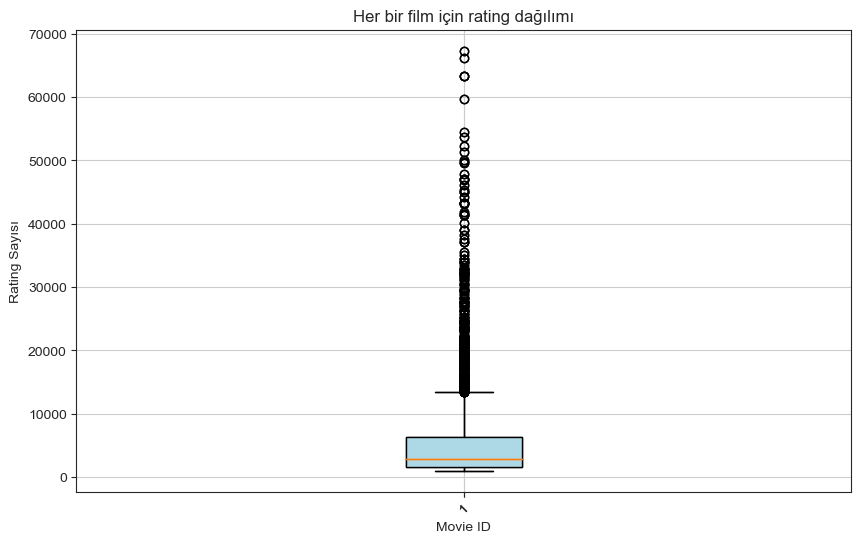

In [55]:
import matplotlib.pyplot as plt

# Kutu grafiğini oluştur
plt.figure(figsize=(10, 6))
plt.boxplot(son.groupby("movieId").agg({"rating":["count"]}), patch_artist=True)

# Grafiği süsle
plt.xlabel('Movie ID')
plt.ylabel('Rating Sayısı')
plt.title('Her bir film için rating dağılımı')

# Kutuları pastel bir renk paletiyle doldur
colors = ['lightblue']
for patch in plt.boxplot(son.groupby("movieId").agg({"rating":["count"]}), patch_artist=True)['boxes']:
    patch.set_facecolor(colors[0])

# Eksen etiketlerini döndür
plt.xticks(rotation=45)

# Grafiği göster
plt.grid(True)
plt.show()


In [ ]:
# En çok oy verilen filmler
IMDB.groupby(["title"]).agg({"rating":["count","mean"]}).sort_values([("rating","count")], ascending=False).head(20)

In [ ]:
import matplotlib.pyplot as plt

# En çok oy verilen filmleri hesapla
top_movies = IMDB.groupby(["title"]).agg({"rating":["count","mean"]}).sort_values([("rating","count")], ascending=False).head(5)

# Verileri grafikte göster
plt.figure(figsize=(10, 6))  # Boyutu küçültüldü
top_movies["rating"]["count"].plot(kind="barh", color="skyblue")  # Grafik yatay olarak düzenlendi
plt.title("En Çok Oy Alan Filmler")
plt.xlabel("Oy Sayısı")
plt.ylabel("Film")
plt.tight_layout()
plt.show()


In [ ]:
#the end